In [65]:
%load_ext autoreload
%autoreload 2
import jax
import jax.numpy as jnp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import os
os.sys.path.append('/Users/yuanqingwang/Documents/GitHub/lean')

In [71]:
def potential_component(
        x, 
        tao=1.0, 
        a=0.0, 
        b=-4.0, 
        c=0.9, 
        d0=4.0,
        **kwargs,
):
    energy = (1 / (2 * tao)) * (
        a * (x - d0)
        + b * (x - d0) ** 2
        + c * (x - d0) ** 4
    )
    return energy


def potential(
        x,
        **kwargs,
):
    return potential_component(x, **kwargs).sum()


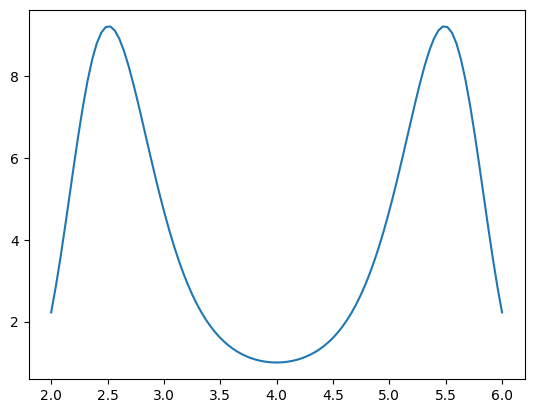

In [72]:
from matplotlib import pyplot as plt
plt.plot(
    jnp.linspace(2, 6, 100),
    jnp.exp(-potential_component(jnp.linspace(2, 6, 100))),
)


In [73]:
position = jax.random.uniform(
    jax.random.PRNGKey(0),
    shape=(1000,),
    minval=2,
    maxval=6,
)
momentum = jnp.zeros_like(position)

In [74]:
from lean.samplers import HamiltonianMonteCarlo
sampler = HamiltonianMonteCarlo(potential, 0.01, 100000)
position, momentum = sampler(position, momentum)


<Axes: ylabel='Density'>

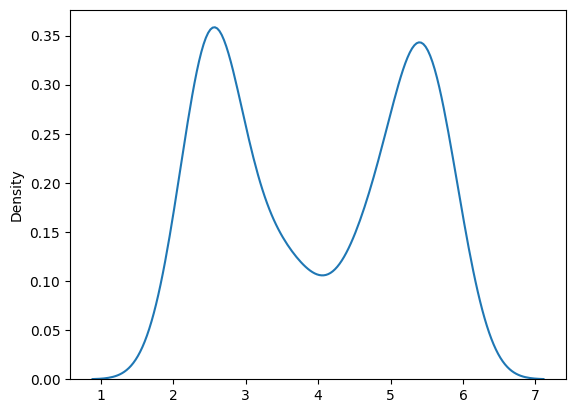

In [75]:
import seaborn as sns
sns.kdeplot(position)